<h1>This notebook shows how I reduce the size of the properties dataset by selecting smaller datatypes. </h1> <p> I noticed the size of the properties dataset is pretty big for a lower/mid-range laptop so I made a script to make the dataset smaller without losing information. </p>
<h3>This notebook uses the following approach: </h3>
<ol>
<li>Iterate over every column </li>
<li>Determine if the column is numeric </li>
<li>Determine if the column can be represented by an integer </li>
<li>Find the min and the max value </li>
<li>Determine and apply the smallest datatype that can fit the range of values </li>
</ol>

<h3> This reduces the dataset from approx. 1.3 GB to 466 MB </h3>

<h2> 1 | load packages </h2>

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

SyntaxError: invalid syntax (<ipython-input-5-fce8cf0985d9>, line 3)

<h2> 2 | Function for reducing memory usage of a pandas dataframe </h2>

In [2]:
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

<h2> 3 | Load Data </h2>

In [3]:
#train_identity = pd.read_csv('train_identity.csv')
#train_transaction = pd.read_csv('train_transaction.csv')
test_identity = pd.read_csv('test_identity.csv')
test_transaction = pd.read_csv('test_transaction.csv')
#sub = pd.read_csv('sample_submission.csv')
# let's combine the data and work with the whole dataset
#props = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')
del test_identity, test_transaction

<h2> 4 | Run function </h2>

In [4]:
props, NAlist = reduce_mem_usage(test)
print("_________________")
print("")
print("Warning: the following columns have missing values filled with 'df['column_name'].min() -1': ")
print("_________________")
print("")
print(NAlist)

Memory usage of properties dataframe is : 1677.7335662841797  MB
******************************
Column:  TransactionID
dtype before:  int64
dtype after:  uint32
******************************
******************************
Column:  TransactionDT
dtype before:  int64
dtype after:  uint32
******************************
******************************
Column:  TransactionAmt
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  card1
dtype before:  int64
dtype after:  uint16
******************************
******************************
Column:  card2
dtype before:  float64
dtype after:  uint16
******************************
******************************
Column:  card3
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  card5
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  addr1
dtype before:  float64
d

dtype after:  uint8
******************************
******************************
Column:  V30
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V31
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V32
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V33
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V34
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V35
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V36
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V37
dtype before:  float64
dtype after:  uint8
******************************
*****

dtype after:  uint8
******************************
******************************
Column:  V100
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V101
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V102
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V103
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V104
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V105
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V106
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V107
dtype before:  float64
dtype after:  uint8
****************************

dtype after:  uint16
******************************
******************************
Column:  V169
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V170
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V171
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V172
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V173
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V174
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V175
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V176
dtype before:  float64
dtype after:  uint8
***************************

dtype after:  uint8
******************************
******************************
Column:  V238
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V239
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V240
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V241
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V242
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V243
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V244
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V245
dtype before:  float64
dtype after:  uint8
****************************

dtype after:  float32
******************************
******************************
Column:  V309
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V310
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V311
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V312
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V313
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V314
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V315
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V316
dtype before:  float64
dtype after:  float32
**********

In [17]:
low_cardinality_categorical = []
for col, values in train.iteritems():
    num_uniques = values.nunique()
    if num_uniques <25:
        low_cardinality_categorical.append(col)
    print ('{name}: {num_unique}'.format(name=col, num_unique=num_uniques))
    print (values.unique()[:min(20,len(values.unique()))])
    print ('\n')

TransactionID: 590540
[2987000 2987001 2987002 2987003 2987004 2987005 2987006 2987007 2987008
 2987009 2987010 2987011 2987012 2987013 2987014 2987015 2987016 2987017
 2987018 2987019]


isFraud: 2
[0 1]


TransactionDT: 573349
[86400 86401 86469 86499 86506 86510 86522 86529 86535 86536 86549 86555
 86564 86585 86596 86618 86620 86668 86725 86730]


TransactionAmt: 20902
[ 68.5         29.          59.          50.          49.
 159.         422.5         15.         117.          75.88700104
  16.49500084  40.          10.5         57.95000076  30.
 100.          47.95000076 186.          39.         159.94999695]


ProductCD: 5
['W' 'H' 'C' 'S' 'R']


card1: 13553
[13926  2755  4663 18132  4497  5937 12308 12695  2803 17399 16496  4461
  3786 12866 11839  7055  1790 11492  7005  7875]


card2: 501
[ 99 404 490 567 514 555 360 100 111 352 375 418 303 314 543 583 148 321
 269 361]


card3: 115
[150 117 185 143 144 163 146 191 162 119 147 100 135 137 138 102 213 106
 214 148]


card4:

[  1 255   2   0   5   3   4   6   7]


V67: 10
[  1 255   2   0   3   5   7   4   6   8]


V68: 4
[  0 255   1   2]


V69: 7
[  0 255   1   2   3   4   5]


V70: 8
[  0 255   1   2   4   5   3   6]


V71: 8
[  0 255   1   2   6   3   4   5]


V72: 12
[  0 255   1   2   6   3   7   4   5   8   9  10]


V73: 9
[  0 255   2   1   5   3   4   6   7]


V74: 10
[  0 255   2   1   3   5   7   4   6   8]


V75: 6
[  1   0 255   2   3   4]


V76: 8
[  1   0 255   3   2   4   5   6]


V77: 32
[  1 255   3   4   2   5   6   0   9  10   7   8  11  12  13  14  15  16
  17  18]


V78: 33
[  1 255   3   2   4   5   6   0   9   7   8  10  11  12  13  14  15  16
  17  18]


V79: 9
[  0 255   1   2   3   4   5   6   7]


V80: 21
[  0 255   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18]


V81: 21
[  0 255   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18]


V82: 9
[  0   1 255   2   3   4   5   6   7]


V83: 9
[  0   1 255   2   3   4   5   6   7]


V84: 9

[-1.000e+00  5.150e+02  0.000e+00  4.750e+02  5.750e+02  5.000e+01
  2.500e+02  6.000e+02  7.500e+02  1.000e+01  7.950e+02  4.500e+01
  1.000e+02  1.500e+02  8.700e+02  2.000e+02  9.450e+02  1.020e+03
  1.070e+03  1.045e+03]


V165: 2548
[-1.000e+00  5.155e+03  0.000e+00  5.255e+03  5.000e+01  2.500e+02
  5.280e+03  5.430e+03  1.000e+01  5.475e+03  5.165e+03  4.500e+01
  1.000e+02  1.500e+02  5.240e+03  2.000e+02  5.315e+03  5.390e+03
  5.440e+03  7.000e+02]


V166: 988
[-1.00e+00  2.84e+03  0.00e+00  2.74e+03  2.79e+03  2.49e+03  2.00e+02
  2.54e+03  2.61e+03  2.56e+03  1.00e+02  3.00e+02  5.00e+02  4.75e+02
  2.76e+03  2.91e+03  1.50e+02  3.00e+01  6.00e+01  9.00e+01]


V167: 874
[65535     0     3     4     1     5     2     6     7     8     9    10
    11    12    13    14    15    16    17    18]


V168: 966
[65535     0     3     1     4     2     5     7     8    10     6    47
    38    48    41     9    11    12    13    14]


V169: 21
[255   0   3   4   5   1   2   6   7   8

[65535     0     1     2     3    18     4     7     8     9    10    11
    12    13    14    15    16     5     6    17]


V234: 123
[255   0   1   2  35   3   4   5  34  22  49  50   7  51  18   8  54   6
  55  36]


V235: 25
[255   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18]


V236: 47
[255   0   1   2  29   3   4   5  11   7  18   8  28  30  26  27  31   9
   6  19]


V237: 41
[255   0   1   2  13   3   4   7   5   8  12  10   9   6  11  14  15  16
  17  18]


V238: 25
[255   0   1   2   3   4   7   5   6   8  11   9  14  10  23  16  12  13
  15  20]


V239: 25
[255   0   1   2   3   4   7   5   8   6  11   9  14  10  23  16  12  13
  15  20]


V240: 7
[255   1   2   5   6   7   0]


V241: 6
[255   1   2   4   5   0]


V242: 22
[255   1   2   7   4   8   9  10   3  11  12   6   5  13  14  15  16  17
  18  19]


V243: 44
[255   1   2  49   4   3  50  51   5   6  52  53  47  48   7   8   9  33
  34  40]


V244: 24
[255   1   2   7   4   8   9  10  11 

[  0   1   2   3   4   5   6   7   8   9 255  10  11  12]


V298: 95
[ 0  1  2  6  3 11  4  7  5  8  9 17 39 10 12 40 18 13 14 15]


V299: 51
[  0   1   2   3   4   5   7   6   8   9  13  10  11  12  14  15  16  19
  17 255]


V300: 13
[  0   1   2   3   4   5   6   7   8   9  10  11 255]


V301: 15
[  0   1   2   3   4   5   6   7   8   9  10  11 255  12  13]


V302: 18
[  0   1   2   3   4   5 255   6   7   8   9  10  11  12  13  14  15  16]


V303: 22
[  0   1   2   7   4   3  13   5   8   6   9 255  17  10  11  12  15  14
  16  18]


V304: 18
[  0   1   2   3   7   4   5 255   6   8   9  10  11  12  13  14  15  16]


V305: 3
[1 2 0]


V306: 16211
[   0.           50.          166.21539307   29.          774.
  200.           58.95000076  530.         1054.          500.
   77.          780.          100.           42.59609985  280.
   54.37799835  107.94999695   75.88749695   66.15989685   89.9654007 ]


V307: 37368
[  117.             0.          1758.           166.21539307
    6

[nan 'NotFound' 'Found']


id_13: 55
[ 9 49 52 14 20 55 43 18 41 63 61 35 25 39 57 15 11 44 62 59]


id_14: 26
[-661 -480 -300 -360 -420 -540 -600  480 -240  300 -180   60    0  180
  540  600  420  270  120  240]


id_15: 3
[nan 'New' 'Found' 'Unknown']


id_16: 2
[nan 'NotFound' 'Found']


id_17: 105
[ 99 166 121 225 102 148 199 146 144 133 100 130 218 150 195 153 159 142
 210 200]


id_18: 19
[ 9 15 18 13 12 20 21 14 26 24 17 11 29 16 28 25 23 27 10]


id_19: 523
[ 99 542 621 410 176 529 352 484 254 278 307 266 290 548 122 215 100 345
 242 193]


id_20: 395
[ 99 144 500 142 507 575 600 533 333 549 566 305 401 391 535 325 222 277
 368 597]


id_21: 491
[ 99 252 657 724 228 369 796 755 848 734 849 596 672 255 457 164 409 130
 680 510]


id_22: 26
[ 9 14 41 21 33 35 19 20 31 12 36 23 28 40 24 39 22 43 26 44]


id_23: 3
[nan 'IP_PROXY:TRANSPARENT' 'IP_PROXY:ANONYMOUS' 'IP_PROXY:HIDDEN']


id_24: 13
[10 11 15 16 12 21 18 25 26 19 23 24 17]


id_25: 342
[ 99 321 161 460 426 205 268 509 13

In [132]:
import matplotlib.pyplot as plt

def graph_fraud_rate(col,train=train,fraud='isFraud'):    
    x = train[col].unique()
    x_counts = train[col].value_counts(normalize=True,dropna=False)
    total_fraud_rate = train['isFraud'].mean()
    if len(x) > 25:
        print("Too many columns: {}".format(len(x)))
    else:
        fraud_rate = train['isFraud'].groupby(by=train[col].astype('str')).mean()
        y_pos = np.arange(len(x))
            
        plt.bar(y_pos,fraud_rate)
        #plt.plot(y_pos,x_counts)
        plt.xticks(y_pos,list(fraud_rate.index))
        plt.axhline(total_fraud_rate)
        plt.ylabel('Fraud Rate')
        plt.title(col)
        plt.show()

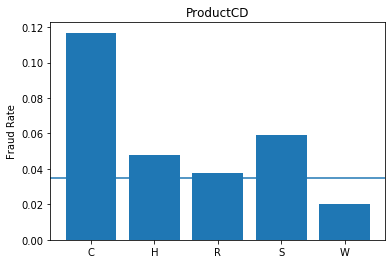

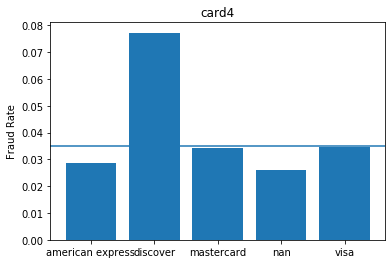

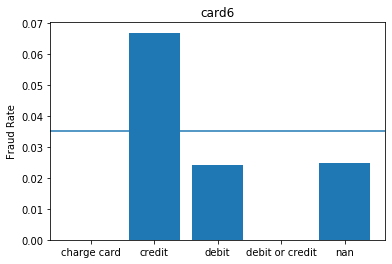

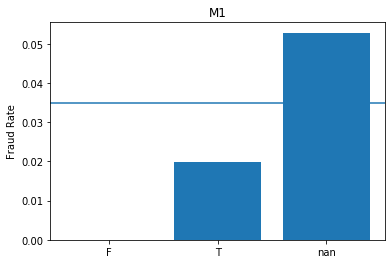

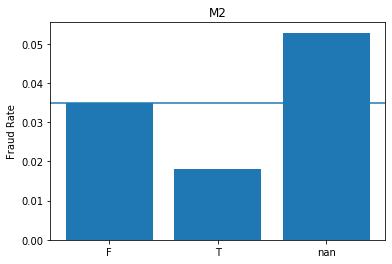

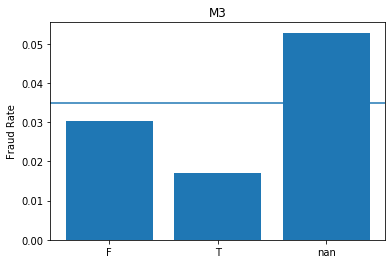

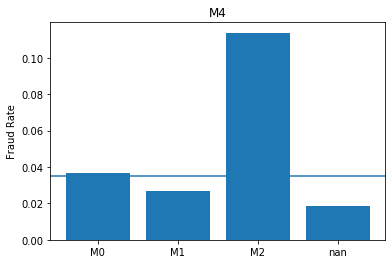

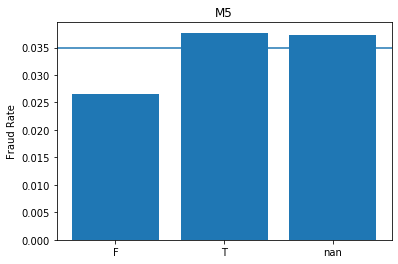

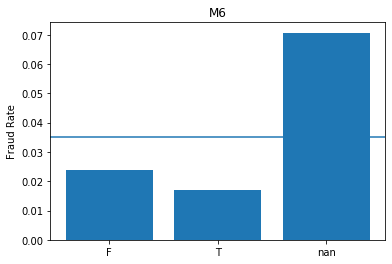

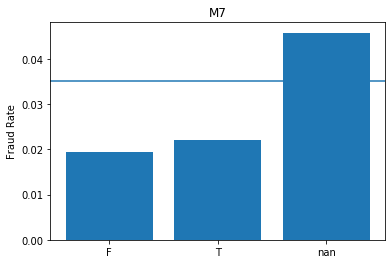

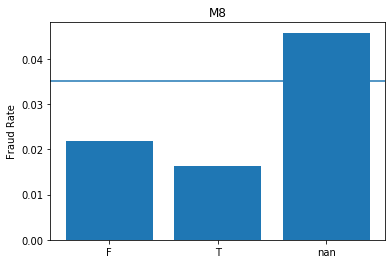

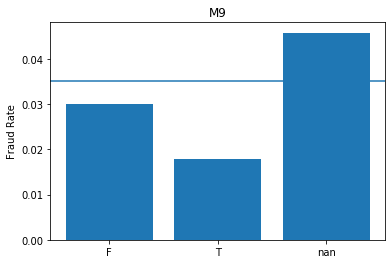

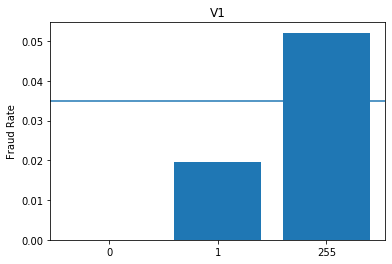

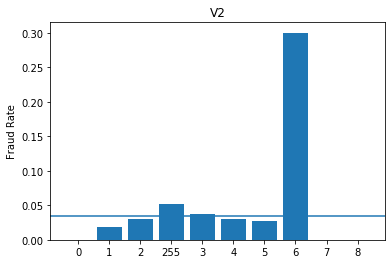

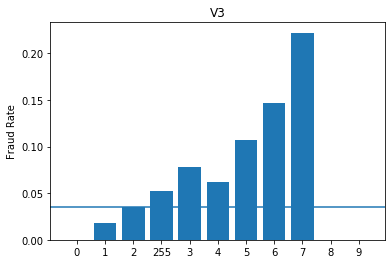

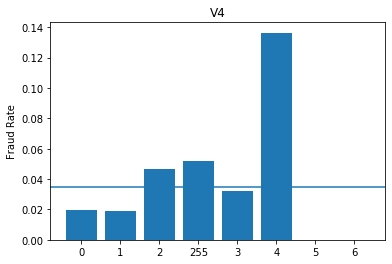

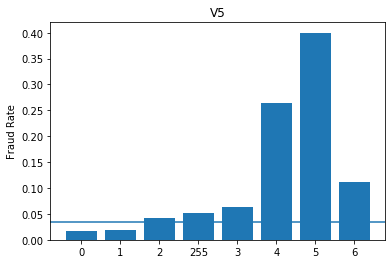

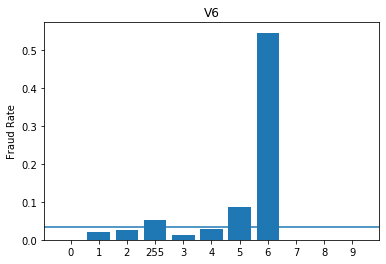

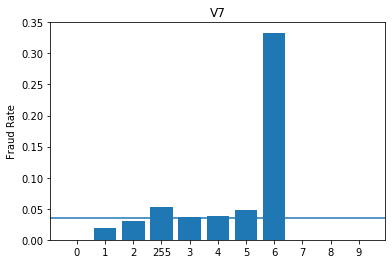

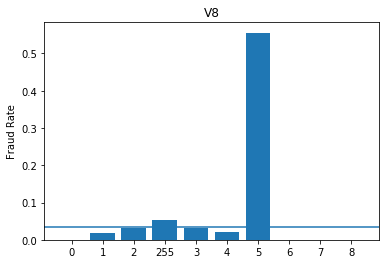

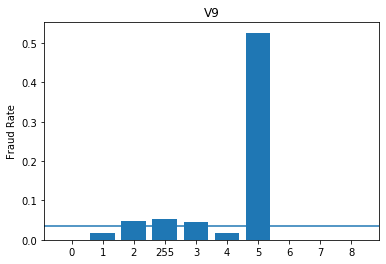

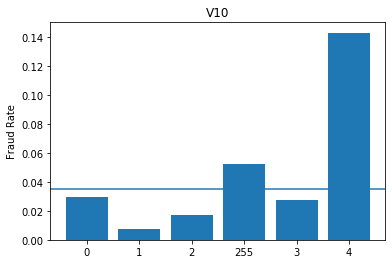

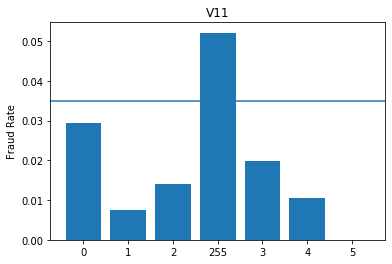

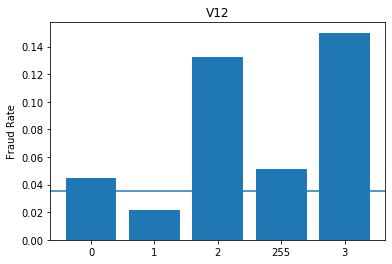

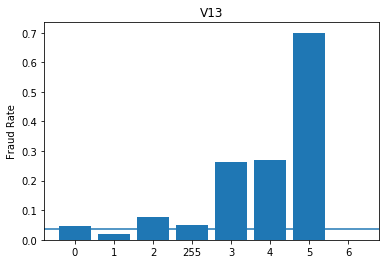

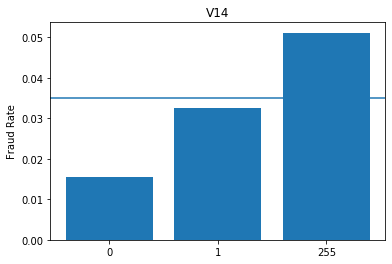

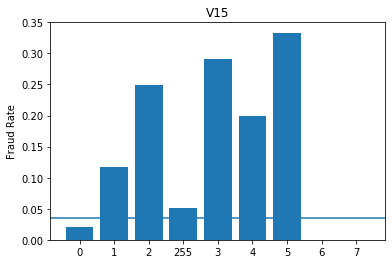

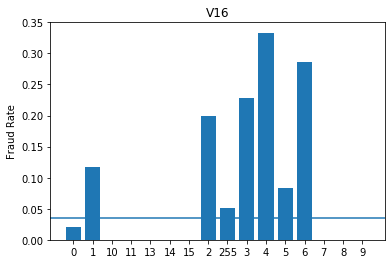

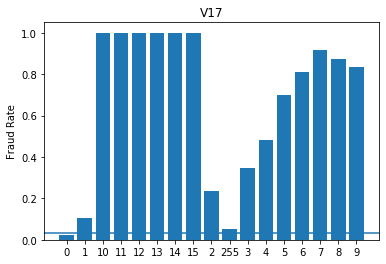

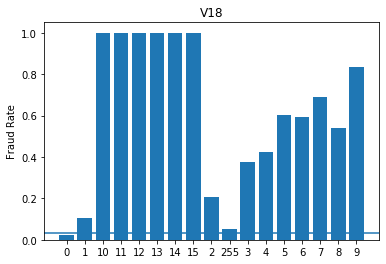

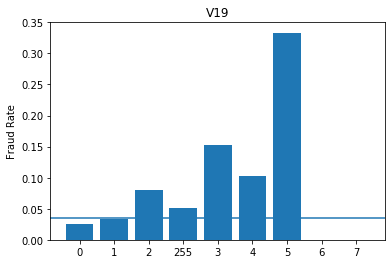

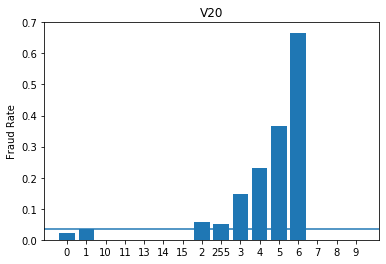

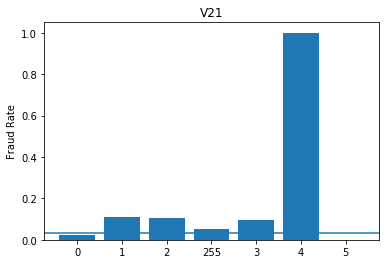

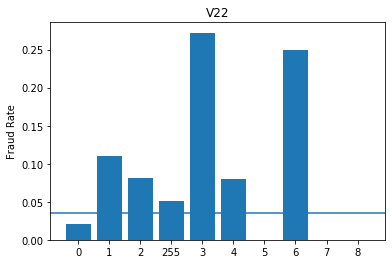

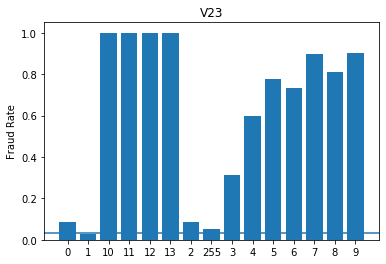

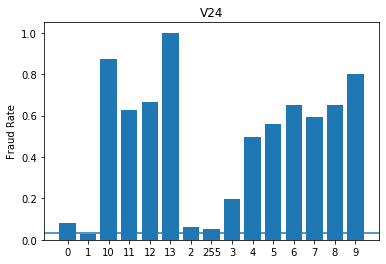

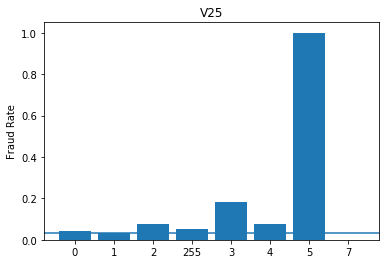

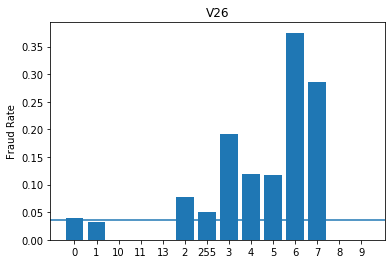

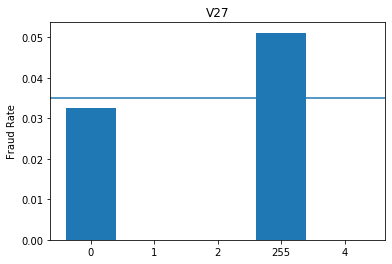

In [133]:
for col in low_cardinality_categorical[1:40]:
    graph_fraud_rate(col)

In [144]:
amount = min(400,train['TransactionAmt'])
#plt.hist(train['TransactionAmt'],bins = 100)
plt.hist(amount,bins = 100)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().